# Include Libraries

In [122]:
import pandas as pd 
#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import f1_score
import time
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Loading Data

In [123]:
df= pd.read_csv('heart.csv')

In [124]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
index=df.index

print('Total rows:', len(index))
print('Total Columns:',len(df.columns))

Total rows: 302
Total Columns: 14


In [126]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [127]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis(EDA):
#### Age : Age of the patient
#### Sex : Sex of the patient
#### exang: exercise induced angina (1 = yes; 0 = no)
#### cp : Chest Pain type chest pain type
#### ca: number of major vessels (0-3)
#### trtbps : resting blood pressure (in mm Hg)
#### chol : cholestoral in mg/dl fetched via BMI sensor
#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### rest_ecg : resting electrocardiographic results
#### thalach : maximum heart rate achieved
#### thalach : maximum heart rate achieved
#### target : 0= less chance of heart attack 1= more chance of heart attack

## Distribution of Categorical Data

Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


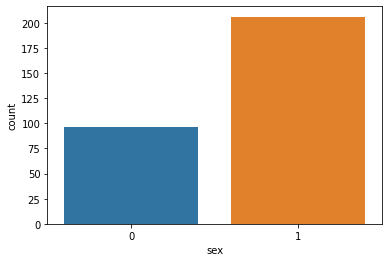

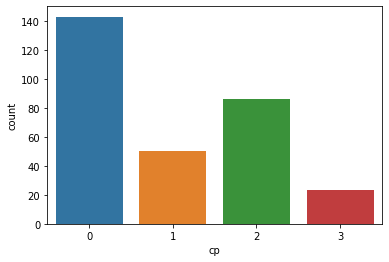

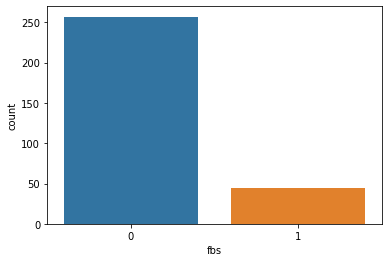

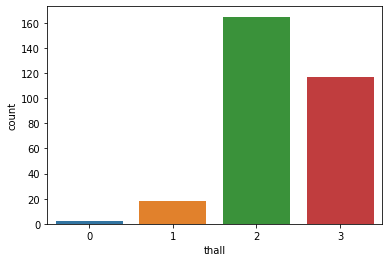

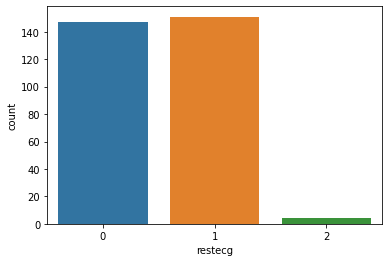

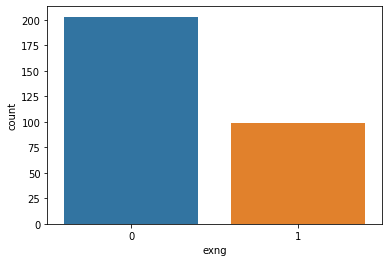

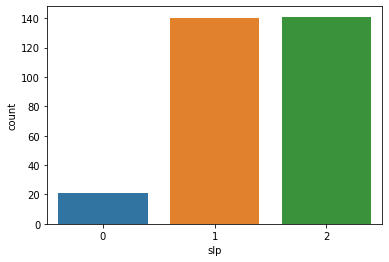

In [128]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
sns.countplot(x='sex',data=df)
plt.show()
sns.countplot(x='cp', data=df)
plt.show()
sns.countplot(x='fbs', data=df)
plt.show()
sns.countplot(x='thall', data=df)
plt.show()
sns.countplot(x='restecg', data=df)
plt.show()
sns.countplot(x='exng', data=df)
plt.show()
sns.countplot(x='slp', data=df)
plt.show()

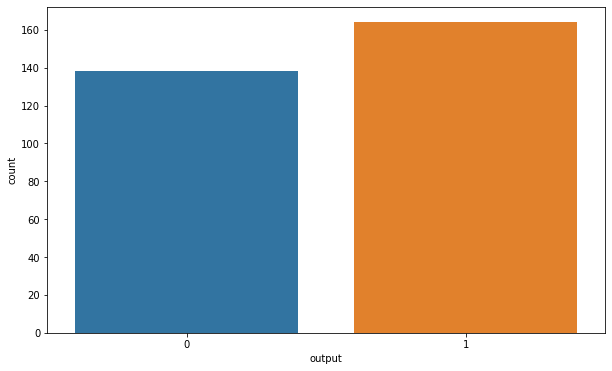

In [129]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x='output', data=df)
plt.show()


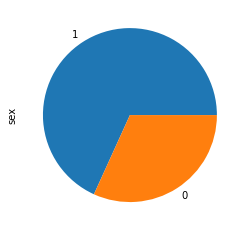

In [130]:
#ax= plt.pie(df, names= "sex",template= "plotly_dark",title= "Gender distribution",hole= 0.5)
#ax.show()
df['sex'].value_counts().plot.pie();
plt.show()

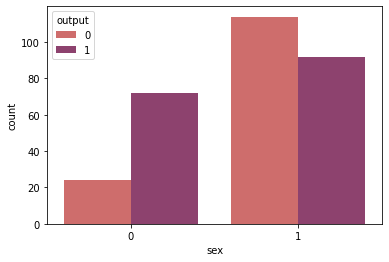

In [131]:
sns.countplot(x='sex', hue='output', data=df, palette='flare')
plt.show()

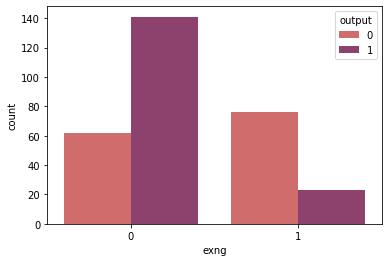

In [132]:
sns.countplot(x='exng', hue='output', data=df, palette='flare')
plt.show()

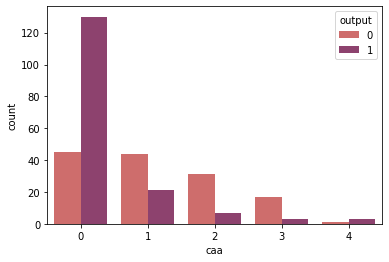

In [133]:
sns.countplot(x='caa', hue='output', data=df, palette='flare')
plt.show()

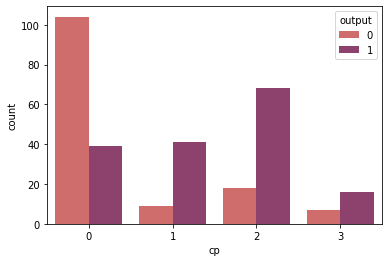

In [134]:
sns.countplot(x='cp', hue='output', data=df, palette='flare')
plt.show()

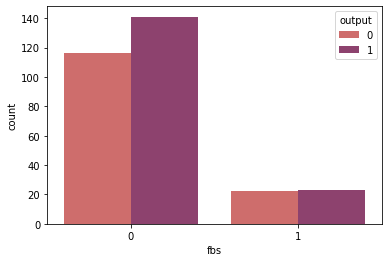

In [135]:
sns.countplot(x='fbs', hue='output', data=df, palette='flare')
plt.show()

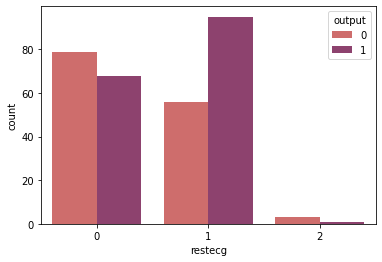

In [136]:
sns.countplot(x='restecg', hue='output', data=df, palette='flare')
plt.show()

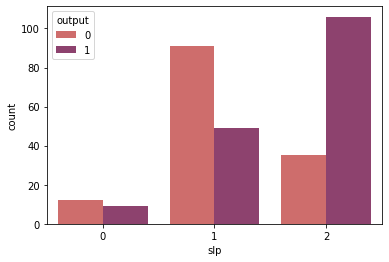

In [137]:
sns.countplot(x='slp', hue='output', data=df,palette='flare')
plt.show()

## Divide the data based on sex variable
### Male vs Female


In [138]:
sex_1=df[df["sex"]==1].reset_index()  
sex_1

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,294,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
202,296,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
203,298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
204,299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [139]:
sex_0=df[df["sex"]==0].reset_index()   
sex_0

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,288,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
92,291,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
93,295,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
94,297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


# Distribution of Non-Categorical Data (Continous Data)

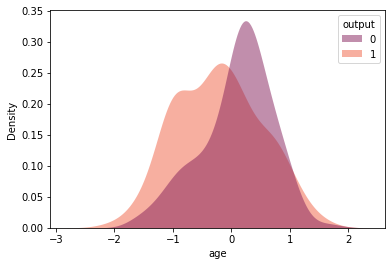

In [228]:
sns.kdeplot(x='age', hue='output', data=df, fill=True, alpha=.5, linewidth=0,palette='rocket')
plt.show()


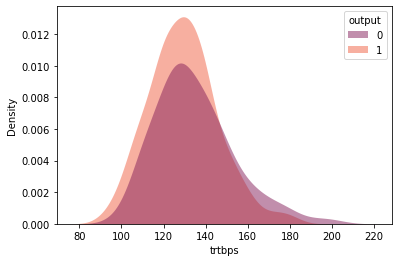

In [141]:
sns.kdeplot(x='trtbps', hue='output', data=df, fill=True, alpha=.5, linewidth=0,palette='rocket')
plt.show()


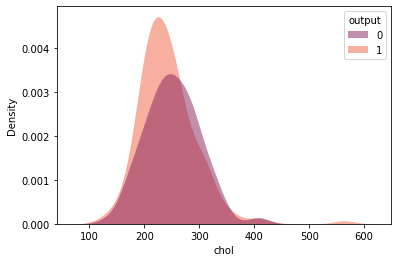

In [142]:
sns.kdeplot(x='chol', hue='output', data=df, fill=True, alpha=.5, linewidth=0,palette='rocket')
plt.show()

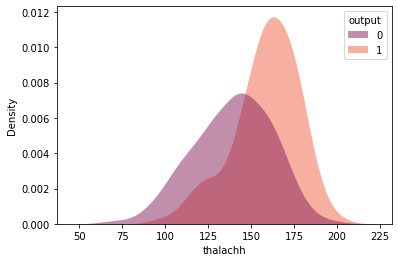

In [143]:
sns.kdeplot(x='thalachh', hue='output', data=df, fill=True, alpha=.5, linewidth=0,palette='rocket')
plt.show()

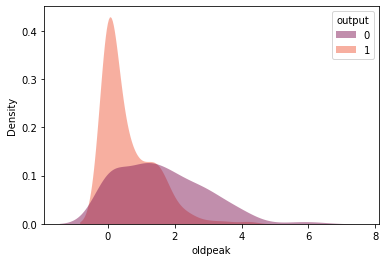

In [144]:
sns.kdeplot(x='oldpeak', hue='output', data=df, fill=True, alpha=0.5, linewidth=0,palette='rocket')
plt.show()

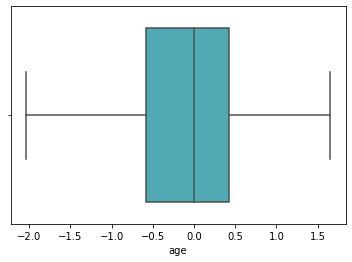

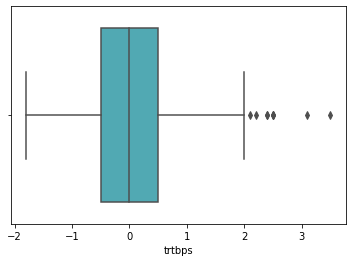

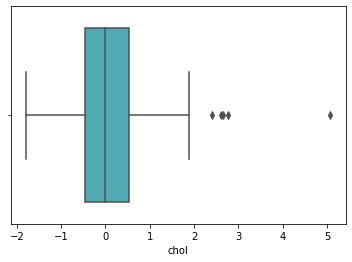

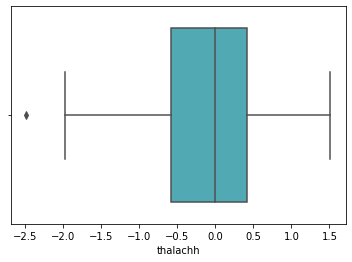

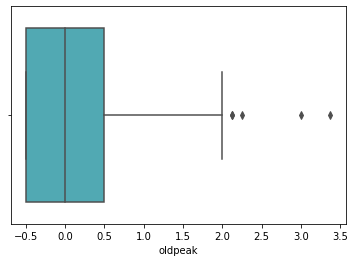

In [207]:
sns.boxplot(x='age',data=df, palette='YlGnBu')
plt.show()
sns.boxplot(x='trtbps',data=df, palette='YlGnBu')
plt.show()
sns.boxplot(x='chol',data=df, palette='YlGnBu')
plt.show()
sns.boxplot(x='thalachh',data=df, palette='YlGnBu')
plt.show()
sns.boxplot(x='oldpeak',data=df, palette='YlGnBu')
plt.show()

In [208]:
df.info

<bound method DataFrame.info of           age  sex  cp  trtbps      chol  fbs  restecg  thalachh  exng  \
0    0.576923    1   3    0.75 -0.117647    1        0 -0.076336     0   
1   -1.423077    1   2    0.00  0.149020    0        1  1.053435     0   
2   -1.115385    0   1    0.00 -0.572549    0        0  0.595420     0   
3    0.038462    1   1   -0.50 -0.070588    0        1  0.778626     0   
4    0.115385    0   0   -0.50  1.780392    0        1  0.320611     1   
..        ...  ...  ..     ...       ...  ...      ...       ...   ...   
297  0.115385    0   0    0.50  0.007843    0        1 -0.900763     1   
298 -0.807692    1   3   -1.00  0.368627    0        1 -0.625954     0   
299  0.961538    1   0    0.70 -0.745098    1        1 -0.351145     0   
300  0.115385    1   0    0.00 -1.717647    0        1 -1.145038     1   
301  0.115385    0   1    0.00 -0.070588    0        0  0.656489     0   

     oldpeak  slp  caa  thall  output  
0     0.9375    0    0      1       1  

# Feature and Label selection


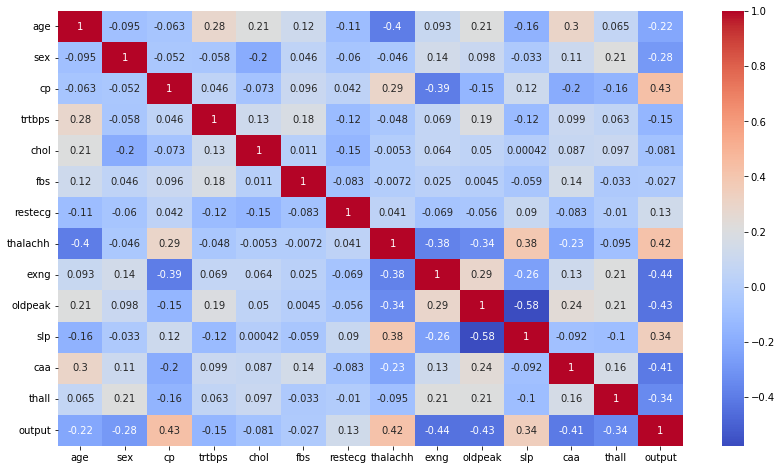

In [209]:
fig = plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Data have no missing Values

In [210]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [211]:
cat_columns = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_columns = ["age","trtbps","chol","thalachh","oldpeak"]
target_column = ["output"]

In [212]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[con_columns] = scaler.fit_transform(df[con_columns])

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.576923,1,3,0.75,-0.117647,1,0,-0.076336,0,0.9375,0,0,1,1
1,-1.423077,1,2,0.00,0.149020,0,1,1.053435,0,1.6875,0,0,2,1
2,-1.115385,0,1,0.00,-0.572549,0,0,0.595420,0,0.3750,2,0,2,1
3,0.038462,1,1,-0.50,-0.070588,0,1,0.778626,0,0.0000,2,0,2,1
4,0.115385,0,0,-0.50,1.780392,0,1,0.320611,1,-0.1250,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.115385,0,0,0.50,0.007843,0,1,-0.900763,1,-0.3750,1,0,3,0
298,-0.807692,1,3,-1.00,0.368627,0,1,-0.625954,0,0.2500,1,0,3,0
299,0.961538,1,0,0.70,-0.745098,1,1,-0.351145,0,1.6250,1,2,3,0
300,0.115385,1,0,0.00,-1.717647,0,1,-1.145038,1,0.2500,1,1,3,0


# Checking The outliers in Data

In [213]:
import numpy as np
q1, q3 = np.percentile(df, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
print(lower_bound)
print(upper_bound)
print('Total Numbers of outliers are',np.size(np.where((df > upper_bound)|(df < lower_bound))))

-1.5
2.5
Total Numbers of outliers are 388


# Normalizing the Data

In [214]:
def outliers(df,ft):
   # Q1, Q3 = np.percentile(df[ft], [25, 75])
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    ls=df.index[(df[ft]>upper_bound)|(df[ft]<lower_bound)]
    return ls


In [215]:
index_list=[]
for feature in df.columns:
    index_list.extend(outliers(df,feature))
    
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df
df_cleaned=remove(df,index_list)
df_cleaned.count()

age         228
sex         228
cp          228
trtbps      228
chol        228
fbs         228
restecg     228
thalachh    228
exng        228
oldpeak     228
slp         228
caa         228
thall       228
output      228
dtype: int64

In [216]:
print('Total Numbers of outliers are',np.size(np.where((df_cleaned > upper_bound)|(df_cleaned < lower_bound))))

Total Numbers of outliers are 234


In [217]:
X = df_cleaned.drop('output', axis=1)
Y = df_cleaned['output']

In [218]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
1,-1.423077,1,2,0.0,0.149020,0,1,1.053435,0,1.6875,0,0,2
2,-1.115385,0,1,0.0,-0.572549,0,0,0.595420,0,0.3750,2,0,2
3,0.038462,1,1,-0.5,-0.070588,0,1,0.778626,0,0.0000,2,0,2
4,0.115385,0,0,-0.5,1.780392,0,1,0.320611,1,-0.1250,2,0,2
5,0.115385,1,0,0.5,-0.760784,0,1,-0.137405,0,-0.2500,1,0,1


In [219]:
df_cleaned.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,-0.166667,0.675439,0.942982,-0.066447,0.029377,0.0,0.548246,-0.043659,0.315789,0.091283,1.451754,0.47807,2.315789,0.578947
std,0.709924,0.469241,1.020190,0.767457,0.695370,0.0,0.516125,0.686808,0.465852,0.647139,0.587945,0.69893,0.560299,0.494814
min,-2.038462,0.000000,0.000000,-1.800000,-1.717647,0.0,0.000000,-1.969466,0.000000,-0.500000,0.000000,0.00000,1.000000,0.000000
25%,-0.807692,0.000000,0.000000,-0.500000,-0.482353,0.0,0.000000,-0.458015,0.000000,-0.500000,1.000000,0.00000,2.000000,0.000000
50%,-0.115385,1.000000,1.000000,0.000000,-0.023529,0.0,1.000000,0.076336,0.000000,-0.125000,1.500000,0.00000,2.000000,1.000000
75%,0.346154,1.000000,2.000000,0.500000,0.450980,0.0,1.000000,0.480916,1.000000,0.500000,2.000000,1.00000,3.000000,1.000000
max,1.576923,1.000000,3.000000,2.000000,1.874510,0.0,2.000000,1.511450,1.000000,2.000000,2.000000,2.00000,3.000000,1.000000


In [220]:
Y.head()

1    1
2    1
3    1
4    1
5    1
Name: output, dtype: int64

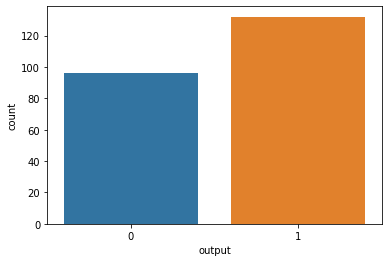

In [221]:
sns.countplot(x="output", data=df_cleaned)
plt.show()

# Spliting the train and test data

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [223]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred, average='micro')}")

Logistic Regression F1 Score: 0.7608695652173914


# Sklearn Model

In [225]:


def compute(Y_pred,Y_test):
    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))


In [226]:

start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,y_train)
y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(y_test,y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(y_pred,y_test)

Execution time of model: 0.92138 seconds
Precision: 0.719 
Recall: 0.92 
F1-Score: 0.807 
Accuracy: 76.087 %
Mean Square Error: 0.239
